In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
import seaborn as sns

import world_model
import plan_optimizer as po
import planning_cases

sns.set(style="whitegrid")
sns.set_context(context="paper")

In [2]:
wm = world_model.WorldModelWrapper()
wm.load_model()

# wm.build_keras_model(neurons=20, hidden_layers=1, dropout_rate=0)
# wm.train_model(env=env, max_iterations=5000, steps=20)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
env_angles, figure = planning_cases.environment_angle_behavior()
print(env_angles.describe())
print(env_angles.info())
env_angles.head()

          theta_0     theta_1  theta_dot_1
count  181.000000  181.000000   181.000000
mean     1.570796    1.579537     0.174815
std      0.914454    0.914528     0.233556
min      0.000000   -0.015000    -0.300000
25%      0.785398    0.796915    -0.019045
50%      1.570796    1.593296     0.230330
75%      2.356194    2.367711     0.390379
max      3.141593    3.126593     0.450000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
theta_0        181 non-null float64
theta_1        181 non-null float64
theta_dot_1    181 non-null float64
dtypes: float64(3)
memory usage: 4.3 KB
None


/home/joshua/anaconda3/envs/ai_gym/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


,theta_0,theta_1,theta_dot_1
0,0.000000,-0.015000,-0.300000
1,0.017453,0.003108,-0.286911
2,0.034907,0.021215,-0.273825
3,0.052360,0.039322,-0.260748
4,0.069813,0.057429,-0.247683


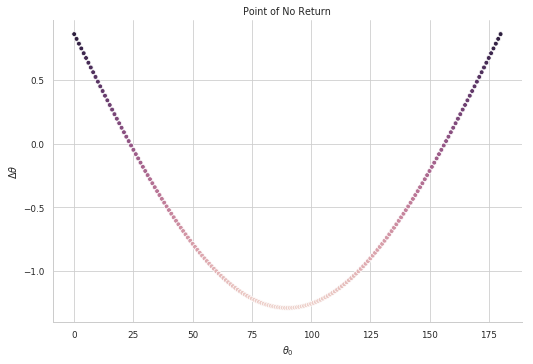

In [4]:
df = env_angles.copy(deep=True)
df["theta_0_deg"] = df["theta_0"].apply(np.degrees)
df["theta_1_deg"] = df["theta_1"].apply(np.degrees)
df["delta_theta"] = df["theta_0_deg"] - df["theta_1_deg"]
df_le = df[df["delta_theta"] >= 0]

# plot as relplot
ponr_plot = sns.relplot(
    x="theta_0_deg",
    y="delta_theta",
    hue="delta_theta",
    height=5,
    legend=False,
    aspect=1.5/1,
    data=df
).set(title="Point of No Return", xlabel=r"$\theta_0$",ylabel=r"$\Delta \theta$")

In [6]:
df[df["delta_theta"] <= 0]

,theta_0,theta_1,theta_dot_1,theta_0_deg,theta_1_deg,delta_theta
24,0.418879,0.419132,0.005052,24.0,24.014474,-0.014474
25,0.436332,0.437180,0.016964,25.0,25.048597,-0.048597
26,0.453786,0.455225,0.028778,26.0,26.082444,-0.082444
27,0.471239,0.473264,0.040493,27.0,27.116004,-0.116004
28,0.488692,0.491297,0.052104,28.0,28.149266,-0.149266
29,0.506145,0.509326,0.063607,29.0,29.182221,-0.182221
30,0.523599,0.527349,0.075000,30.0,30.214859,-0.214859
31,0.541052,0.545366,0.086279,31.0,31.247170,-0.247170
32,0.558505,0.563377,0.097439,32.0,32.279143,-0.279143
33,0.575959,0.581383,0.108479,33.0,33.310770,-0.310770


In [ ]:
ponr_plot.safefig("graphics/point_no_return.svg")

In [6]:
speeds = [0]
angles = [-30, -15, -10, -5, 0, 5, 10, 15, 30]
#angles = [0]
planner = po.Planner(world_model=wm.get_model(),
                     learning_rate=0.5,
                     iterations=100,
                     initial_plan=po.get_zero_plan(5),
                     fill_function=po.get_zero_action,
                     strategy=None
                     )


result, _ = planning_cases.angle_test(planner=planner, angles=angles, speeds=speeds, plan_length=5)

current angle and speed: -30, 0
current step: 0
current step: 1
current step: 2
current step: 3
current step: 4
current step: 5
current step: 6
current step: 7
current step: 8
current step: 9
current step: 10
current step: 11
current step: 12
current step: 13
current step: 14
current step: 15
current step: 16
current step: 17
current step: 18
current step: 19
current step: 20
current step: 21
current step: 22
current step: 23
current step: 24
current step: 25
current step: 26
current step: 27
current step: 28
current step: 29
current step: 30
current step: 31
current step: 32
current step: 33
current step: 34
current step: 35
current step: 36
current step: 37
current step: 38
current step: 39
current step: 40
current step: 41
current step: 42
current step: 43
current step: 44
current step: 45
current step: 46
current step: 47
current step: 48
current step: 49
current angle and speed: -15, 0
current step: 0
current step: 1
current step: 2
current step: 3
current step: 4
current step: 5


In [7]:
print(result.describe())
print(result.info())
result.head()

       init_angle  init_speed        step       theta   theta_dot
count  459.000000       459.0  459.000000  459.000000  459.000000
mean     0.000000         0.0   25.000000    0.010822    0.021348
std     16.684852         0.0   14.735662    1.335275    1.306357
min    -30.000000         0.0    0.000000   -4.192284   -5.205236
25%    -10.000000         0.0   12.000000   -0.205819   -0.028901
50%      0.000000         0.0   25.000000    0.022547   -0.001634
75%     10.000000         0.0   38.000000    0.157557    0.023026
max     30.000000         0.0   50.000000    4.482738    5.451652
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
init_angle    459 non-null int64
init_speed    459 non-null int64
step          459 non-null int64
theta         459 non-null float64
theta_dot     459 non-null float64
dtypes: float64(2), int64(3)
memory usage: 18.0 KB
None


,init_angle,init_speed,step,theta,theta_dot
0,-30,0,0,-0.523599,0.000000
1,-30,0,1,-0.532280,-0.173626
2,-30,0,2,-0.544993,-0.254251
3,-30,0,3,-0.562146,-0.343060
4,-30,0,4,-0.584286,-0.442812


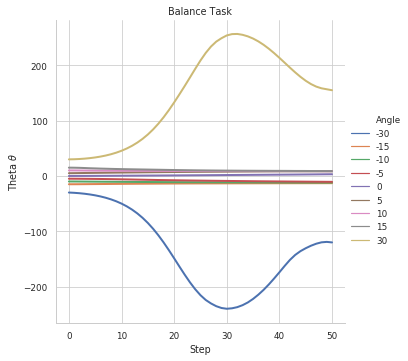

In [8]:
df = result.copy(deep=True)

# sns.cubehelix_palette(n_colors=len(df["Angle"].unique()), start=.5, rot=-.75)
# zip speed and angle together to create an init option identifier
df["init_id"] = list(zip(df["init_angle"], df["init_speed"]))
df["Angle"] = df["init_angle"]
# human readable format
df["theta"] = df["theta"].apply(np.degrees)

# plot as relplot
plan_test_plot = sns.relplot(
    x="step",
    y="theta",
    hue="Angle",
    palette=sns.color_palette(n_colors=len(df["Angle"].unique())),
    height=5,
    linewidth=2,
    kind="line",
    data=df
).set(title="Balance Task", xlabel="Step", ylabel=r"Theta $\theta$")

In [9]:
plan_test_plot.fig.savefig("graphics/plan_test.svg")

In [10]:
df.isna().sum()

init_angle    0
init_speed    0
step          0
theta         0
theta_dot     0
init_id       0
Angle         0
dtype: int64